# Toolkit

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import and Inspect data

In [2]:
df = pd.read_csv(r"Data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# random sample
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
182,183,Male,46,98,15
178,179,Male,59,93,14
23,24,Male,31,25,73
13,14,Female,24,20,77
73,74,Female,60,50,56


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Preprocessing

In [5]:
df.duplicated().sum()

0

In [6]:
for col in df.columns:
    print(f"_______________{col}_______________")
    print(df[col].unique())

_______________CustomerID_______________
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
_______________Gender_______________
['Male' 'Female']
_______________Age_______________
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45

In [7]:
# select features
df.drop("CustomerID", axis=1, inplace=True)

# EDA

In [8]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

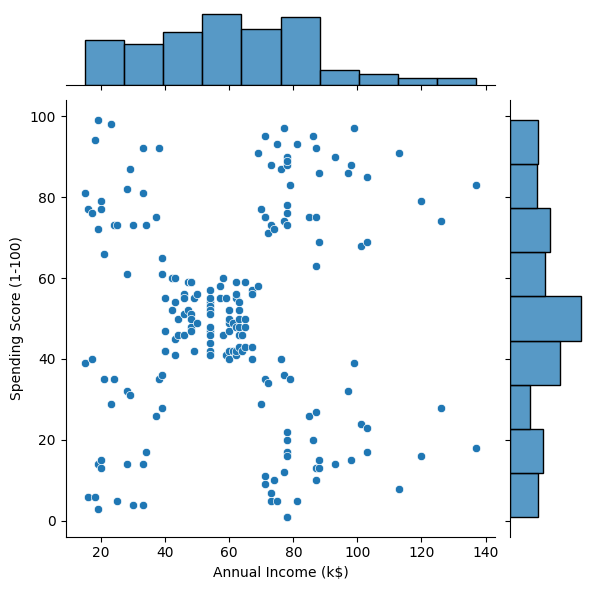

In [9]:
sns.jointplot(df, x="Annual Income (k$)", y='Spending Score (1-100)')

In [10]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [12]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


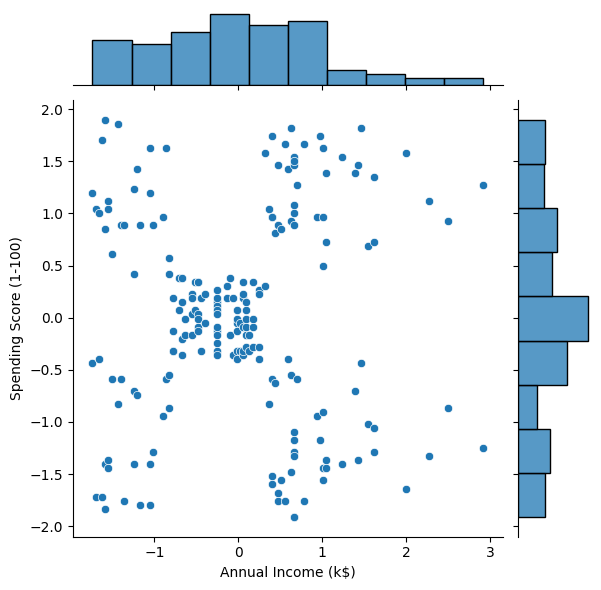

In [13]:
sns.jointplot(x_scaled, x="Annual Income (k$)", y='Spending Score (1-100)')

In [14]:
model = KMeans(n_clusters=3)
model.fit(x_scaled)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
clusters = model.predict(x_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [16]:
x_scaled['clusters'] = clusters

In [17]:
centroids = model.cluster_centers_
centroids

array([[-0.62618966, -0.01439238],
       [ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537]])

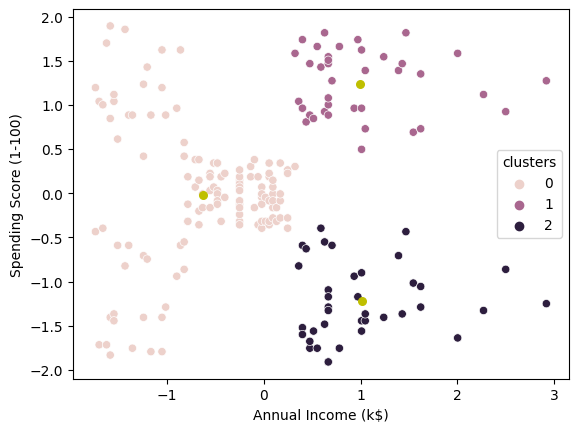

In [18]:
sns.scatterplot(x=x_scaled.iloc[:,0], y=x_scaled.iloc[:,1], hue=x_scaled['clusters'])
plt.scatter(centroids[:,0], centroids[:,1], s=30, c='y')

In [19]:
model.inertia_

157.70400815035947

# Elbow Method

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

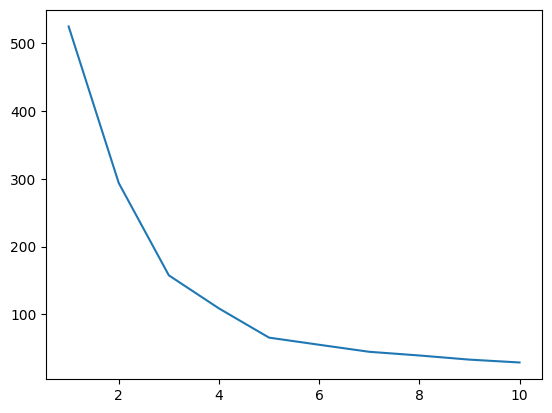

In [20]:
scores = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(x_scaled)
    scores.append(model.inertia_)

plt.plot(range(1, 11), scores)

In [21]:
model = KMeans(n_clusters=5)
model.fit(x_scaled)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [22]:
clusters = model.labels_
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [23]:
x_scaled['clusters'] = clusters

In [24]:
centroids = model.cluster_centers_
centroids

array([[-2.26902576e-01, -6.76888751e-03, -4.44089210e-16],
       [ 9.91583048e-01,  1.23950275e+00,  1.00000000e+00],
       [ 1.00919971e+00, -1.22553537e+00,  2.00000000e+00],
       [-1.30751869e+00, -1.13696536e+00,  2.22044605e-16],
       [-1.32954532e+00,  1.13217788e+00,  1.11022302e-16]])

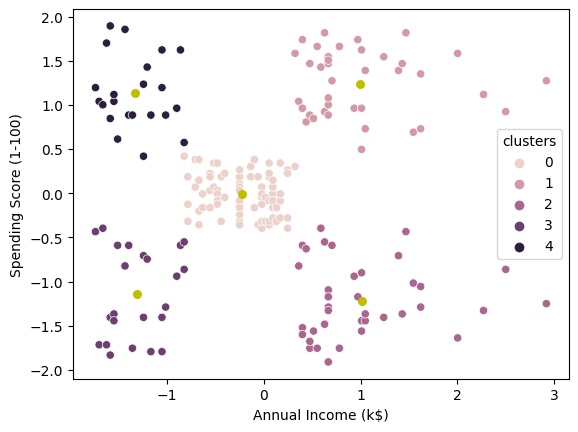

In [25]:
sns.scatterplot(x=x_scaled.iloc[:,0], y=x_scaled.iloc[:,1], hue=x_scaled['clusters'])
plt.scatter(centroids[:,0], centroids[:,1], s=30, c='y')

In [26]:
model.inertia_

65.79788051130146

In [27]:
df = pd.get_dummies(df, drop_first=True)

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [29]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

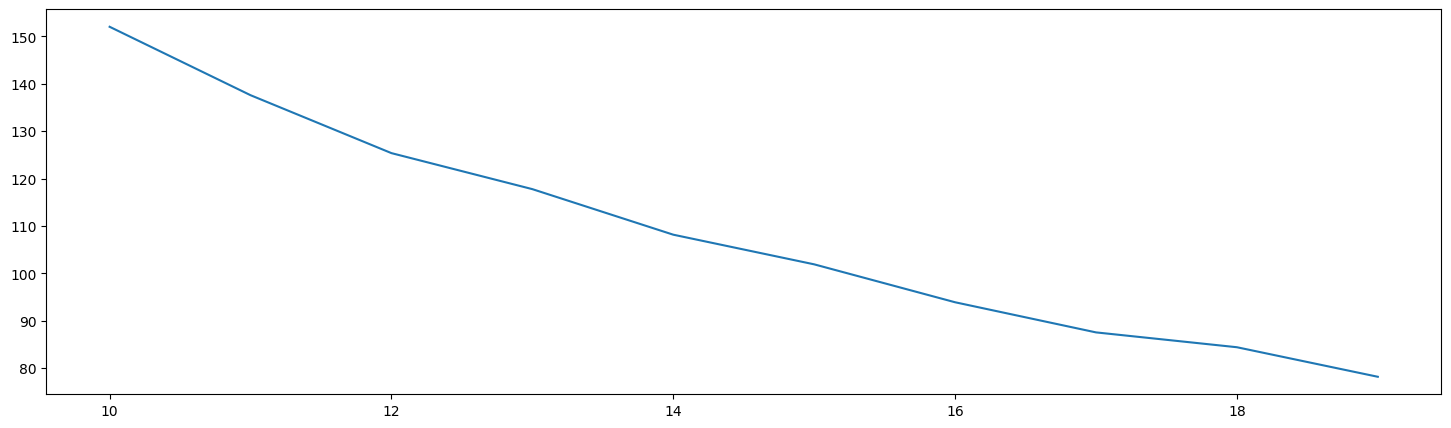

In [30]:
scores = []
for i in range(10, 20):
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    scores.append(model.inertia_)

plt.figure(figsize=(18, 5))
plt.plot(range(10, 20), scores)
plt.show()

In [31]:
model = KMeans(n_clusters=17)
model.fit(df_scaled)

C:\Users\shehab\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=17)

In [32]:
centroids = model.cluster_centers_
centroids

array([[ 1.87669894, -0.26629538,  0.02135186,  1.12815215],
       [-0.47793198,  0.97284787,  1.22158511, -0.88640526],
       [-1.16359901, -0.19140234,  0.11928807,  1.12815215],
       [ 0.54334938, -0.16802585, -0.08336419, -0.88640526],
       [ 0.58489852, -0.13588317, -0.21481264,  1.12815215],
       [-0.96084556, -1.33087991,  1.17778643, -0.88640526],
       [-0.37946637,  0.80165344,  1.28062623,  1.12815215],
       [-0.93245435, -0.17768778, -0.10389389, -0.88640526],
       [-1.03702867, -1.36875573,  0.91618883,  1.12815215],
       [ 1.70445888, -0.31146254,  0.01164647, -0.88640526],
       [ 0.19294198, -1.2985827 , -1.14553467, -0.88640526],
       [-0.84018289,  0.6765804 , -1.70482111,  1.12815215],
       [ 0.41265847,  1.21277   , -1.11029664, -0.88640526],
       [-0.45571848,  2.45963802, -1.44416206,  1.12815215],
       [ 0.98474151, -1.39547433, -1.38315675,  1.12815215],
       [-0.56336851,  2.70773931,  1.09865017,  1.12815215],
       [ 0.75235413,  0.

In [33]:
clusters = model.predict(df_scaled)
clusters

array([ 8,  8, 10,  5, 10,  5, 10,  5, 14,  5, 14,  5, 10,  5, 14,  8, 10,
        8, 14,  5, 14,  8, 10,  8, 10,  8, 10,  8, 10,  5, 14,  5, 14,  8,
       10,  5, 10,  5, 10,  5,  9,  8,  4,  7, 10,  5,  3,  7,  7,  7,  3,
        2,  7,  0,  3,  4,  3,  0,  7,  4,  0,  2,  9,  9,  0,  2,  3,  9,
        2,  7,  0,  3,  9,  9,  0,  2,  3,  4,  7,  3,  0,  4,  0,  3,  7,
        4,  9,  7,  7,  3,  9,  2,  4,  3,  7,  2,  3,  7,  4,  2,  7,  3,
        0,  2,  4,  7,  9,  4,  0,  0,  0,  7,  3,  2,  7,  7,  9,  3,  3,
        3,  2,  3,  3,  6,  7,  1,  4,  6, 16,  6, 16,  6,  7,  1, 11,  1,
       12,  6, 11,  1, 12,  6,  7,  1, 11,  6,  4,  1, 12,  6, 16,  6, 12,
        1, 12,  1, 11,  1, 11,  1, 12,  1, 11,  1, 16,  1, 16,  1, 12,  6,
       16,  6, 11,  6, 12,  1, 16,  6, 16,  6, 12,  1, 16,  1, 12,  6, 12,
        6, 12,  1, 12,  1, 13,  1, 12,  1, 12, 15, 13, 15])

In [34]:
df_scaled['clusters'] = clusters

In [35]:
df_scaled[df_scaled['clusters']==7]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,clusters
43,-0.563369,-0.822933,0.419273,-0.886405,7
47,-0.850435,-0.784763,-0.124229,-0.886405,7
48,-0.706902,-0.784763,-0.318337,-0.886405,7
49,-0.563369,-0.784763,-0.318337,-0.886405,7
52,-0.563369,-0.670255,0.147522,-0.886405,7
58,-0.850435,-0.555747,0.031057,-0.886405,7
69,-0.491602,-0.479408,-0.124229,-0.886405,7
78,-1.137502,-0.250391,0.069879,-0.886405,7
84,-1.281035,-0.250391,0.263987,-0.886405,7
87,-1.209269,-0.135883,0.186343,-0.886405,7


# AgglomerativeClustering

In [36]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

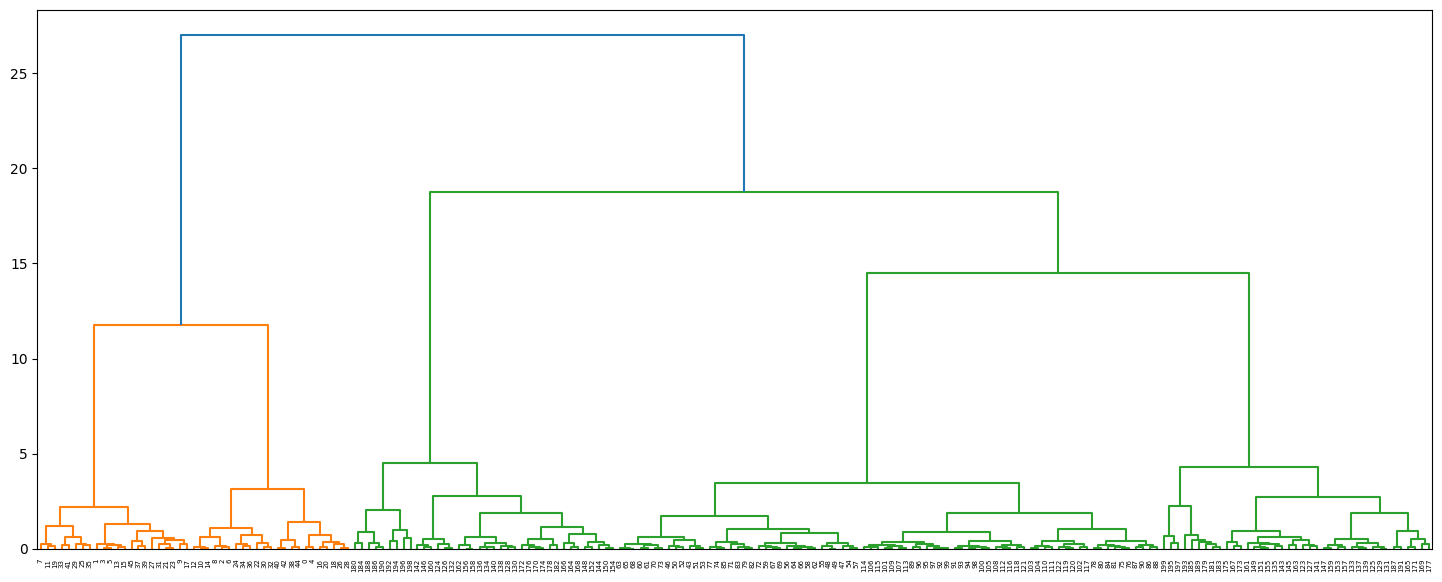

In [37]:
plt.figure(figsize=(18, 7))
dendogram = sch.dendrogram(sch.linkage(x_scaled, method='ward'))

In [38]:
model = AgglomerativeClustering(n_clusters=5)
model.fit(x_scaled)

AgglomerativeClustering(n_clusters=5)

In [39]:
clusters = model.fit_predict(x_scaled)

In [40]:
x_scaled['clusrers'] = clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

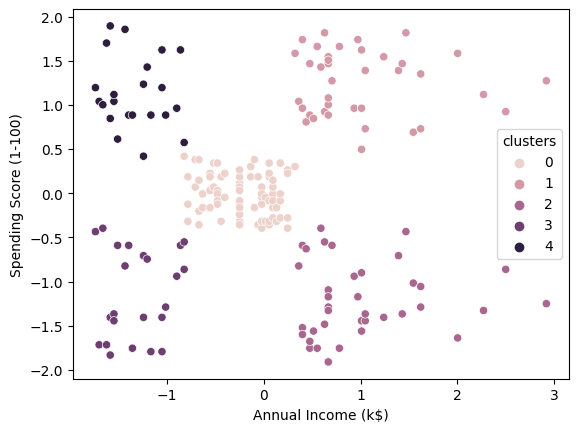

In [41]:
sns.scatterplot(x=x_scaled.iloc[:,0], y=x_scaled.iloc[:,1], hue=x_scaled['clusters'])